In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight") #This line sets the overall style of Matplotlib plots. In this case, it's using the "fivethirtyeight" style.
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf #yfinance is a Python library that provides a simple interface to download financial data from Yahoo Finance. It allows users to fetch historical market data, current market data, and various financial information for stocks, indices, currencies, and commodities.
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32611500,AMAZON
2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,31046600,AMAZON
2024-04-04,184.000000,185.100006,180.000000,180.000000,180.000000,41624300,AMAZON
2024-04-05,182.380005,186.270004,181.970001,185.070007,185.070007,42335200,AMAZON
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39221300,AMAZON
2024-04-09,187.240005,187.339996,184.199997,185.669998,185.669998,36546900,AMAZON
2024-04-10,182.770004,186.270004,182.669998,185.949997,185.949997,35879200,AMAZON
2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700,AMAZON
2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300,AMAZON


In [ ]:
df.count()

Open            1004
High            1004
Low             1004
Close           1004
Adj Close       1004
Volume          1004
company_name    1004
dtype: int64

In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,181.066773,182.530797,179.737689,181.219801,180.796894,5.749573e+07
std,8.897479,8.748629,8.818818,8.785901,8.804050,1.778672e+07
min,163.059998,165.279999,162.800003,163.759995,162.890533,1.887114e+07
25%,173.240005,174.905006,172.050003,173.735001,173.305122,4.657160e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238235,5.363130e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.267560e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-17 to 2024-04-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
#LSTM Training
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to prepare data for LSTM model
def prepare_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    return scaled_data, scaler

# Function to create LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end)['Close']

# Prepare data for training
data_dict = {}
scaler_dict = {}
for stock in tech_list:
    data_dict[stock], scaler_dict[stock] = prepare_data(globals()[stock])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(data_dict)

{'AAPL': array([[4.27947878e-02],
       [7.88939223e-02],
       [1.12664038e-01],
       [8.41338829e-02],
       [3.66815005e-02],
       [4.57061731e-02],
       [2.91405061e-04],
       [0.00000000e+00],
       [1.35371422e-01],
       [1.72343439e-01],
       [1.69723458e-01],
       [1.39155689e-01],
       [1.07423633e-01],
       [5.90974794e-02],
       [2.85589842e-01],
       [2.83551783e-01],
       [2.33188016e-01],
       [2.85298437e-01],
       [2.90829803e-01],
       [2.56477766e-01],
       [2.41921728e-01],
       [2.41921728e-01],
       [2.59971073e-01],
       [3.28675591e-01],
       [3.31877937e-01],
       [3.03930148e-01],
       [2.27074284e-01],
       [2.35225630e-01],
       [2.68704784e-01],
       [3.39737878e-01],
       [3.94177762e-01],
       [3.92722070e-01],
       [4.75400260e-01],
       [5.00436663e-01],
       [4.60553261e-01],
       [4.49781935e-01],
       [4.09316166e-01],
       [4.89374376e-01],
       [5.00728068e-01],
       [5.831148

In [ ]:
from sklearn.model_selection import train_test_split

models = {}

for stock in tech_list:
    X = data_dict[stock].reshape(-1, 1)
    y = np.roll(data_dict[stock], -1).reshape(-1, 1)

    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, shuffle=False)

    X_train = X_train.reshape(X_train.shape[0], 1, 1)

    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

    models[stock] = model

Epoch 1/100
175/175 [==============================] - 2s 2ms/step - loss: 0.0921
Epoch 2/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 4/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 5/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 6/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 7/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 8/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 9/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 10/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 11/100
175/175 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 12/100
175/175 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 13/100


In [ ]:
from sklearn.model_selection import train_test_split
training_percentage = {}

for stock in tech_list:
    X = data_dict[stock].reshape(-1, 1)
    y = np.roll(data_dict[stock], -1).reshape(-1, 1)  # Shift y by one timestep for training

    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.3, shuffle=False)

    # Calculate training percentage
    total_data_points = len(X)
    training_data_points = len(X_train)
    percentage = (training_data_points / total_data_points) * 100
    training_percentage[stock] = percentage

training_percentage


{'AAPL': 69.7211155378486,
 'GOOG': 69.7211155378486,
 'MSFT': 69.7211155378486,
 'AMZN': 69.7211155378486}

In [ ]:
#point prediction

future_prices = {}
for stock in tech_list:
    last_price = data_dict[stock][-1]

    X_pred = np.array([last_price]).reshape(1, 1, 1)

    future_price_scaled = models[stock].predict(X_pred)

    future_price = scaler_dict[stock].inverse_transform(future_price_scaled)

    future_prices[stock] = future_price

print(future_prices)   #the prediction of future stock prices occurs at the point where the model is used to forecast the next price based on the last observed price

1/1 [==============================] - 0s 280ms/step
{'AAPL': array([[175.41249]], dtype=float32), 'GOOG': array([[157.85396]], dtype=float32), 'MSFT': array([[419.453]], dtype=float32), 'AMZN': array([[184.90883]], dtype=float32)}


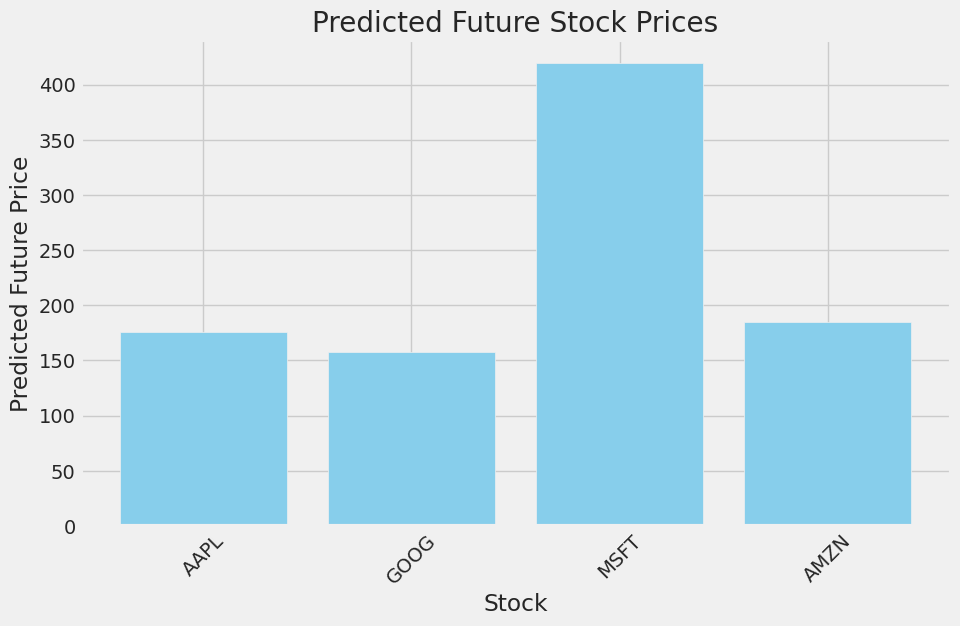

In [ ]:
import matplotlib.pyplot as plt
#bar chart where each bar represents the predicted future price for a specific stock.
# Extracting stock symbols and predicted prices
stocks = list(future_prices.keys())
prices = [future_prices[stock][0][0] for stock in stocks]

# Creating a bar chart to visualize predicted future prices
plt.figure(figsize=(10, 6))
plt.bar(stocks, prices, color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Predicted Future Price')
plt.title('Predicted Future Stock Prices')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Extracting stock symbols and predicted prices
stocks = list(future_prices.keys())
prices = [future_prices[stock][0][0] for stock in stocks]

# Create a horizontal bar chart to visualize predicted future prices
fig = go.Figure(data=[go.Bar(
    y=stocks,
    x=prices,
    orientation='h',
    marker_color='skyblue'
)])

fig.update_layout(title='Predicted Future Stock Prices',
                  xaxis_title='Predicted Price',
                  yaxis_title='Stock',
                  template='plotly_white')

fig.show()

In [ ]:
#Scenario prediction

import numpy as np

# Define scenarios
scenarios = ['Scenario A', 'Scenario B', 'Scenario C']

# Use LSTM model to predict future prices under each scenario
future_prices_scenarios = {}
for stock in tech_list:
    future_prices_scenarios[stock] = {}
    for scenario in scenarios:
        # Adjust variables for each scenario
        if scenario == 'Scenario A':
            variable_a = 0.1  # Placeholder value for Scenario A
            # Adjust other variables specific to Scenario A if needed
        elif scenario == 'Scenario B':
            variable_a = 0.5  # Placeholder value for Scenario B
            # Adjust other variables specific to Scenario B if needed
        else:
            variable_a = 0.9  # Placeholder value for Scenario C
            # Adjust other variables specific to Scenario C if needed


        X_pred_scenario = np.array([future_prices[stock] * variable_a])
        future_price_scaled_scenario = models[stock].predict(X_pred_scenario.reshape(1, 1, 1))
        future_price_scenario = scaler_dict[stock].inverse_transform(future_price_scaled_scenario)
        future_prices_scenarios[stock][scenario] = future_price_scenario

# Evaluate and display results for each scenario
for stock in tech_list:
    print(f"Stock: {stock}")
    for scenario in scenarios:
        print(f"Scenario: {scenario} - Predicted Future Price: {future_prices_scenarios[stock][scenario][0][0]}")


1/1 [==============================] - 0s 16ms/step
Stock: AAPL
Scenario: Scenario A - Predicted Future Price: 365.29473876953125
Scenario: Scenario B - Predicted Future Price: 380.49285888671875
Scenario: Scenario C - Predicted Future Price: 380.0641784667969
Stock: GOOG
Scenario: Scenario A - Predicted Future Price: 312.45867919921875
Scenario: Scenario B - Predicted Future Price: 296.1630554199219
Scenario: Scenario C - Predicted Future Price: 293.0514831542969
Stock: MSFT
Scenario: Scenario A - Predicted Future Price: 1343.5721435546875
Scenario: Scenario B - Predicted Future Price: 1376.875732421875
Scenario: Scenario C - Predicted Future Price: 1371.8389892578125
Stock: AMZN
Scenario: Scenario A - Predicted Future Price: 516.784912109375
Scenario: Scenario B - Predicted Future Price: 512.7578735351562
Scenario: Scenario C - Predicted Future Price: 509.1847229003906


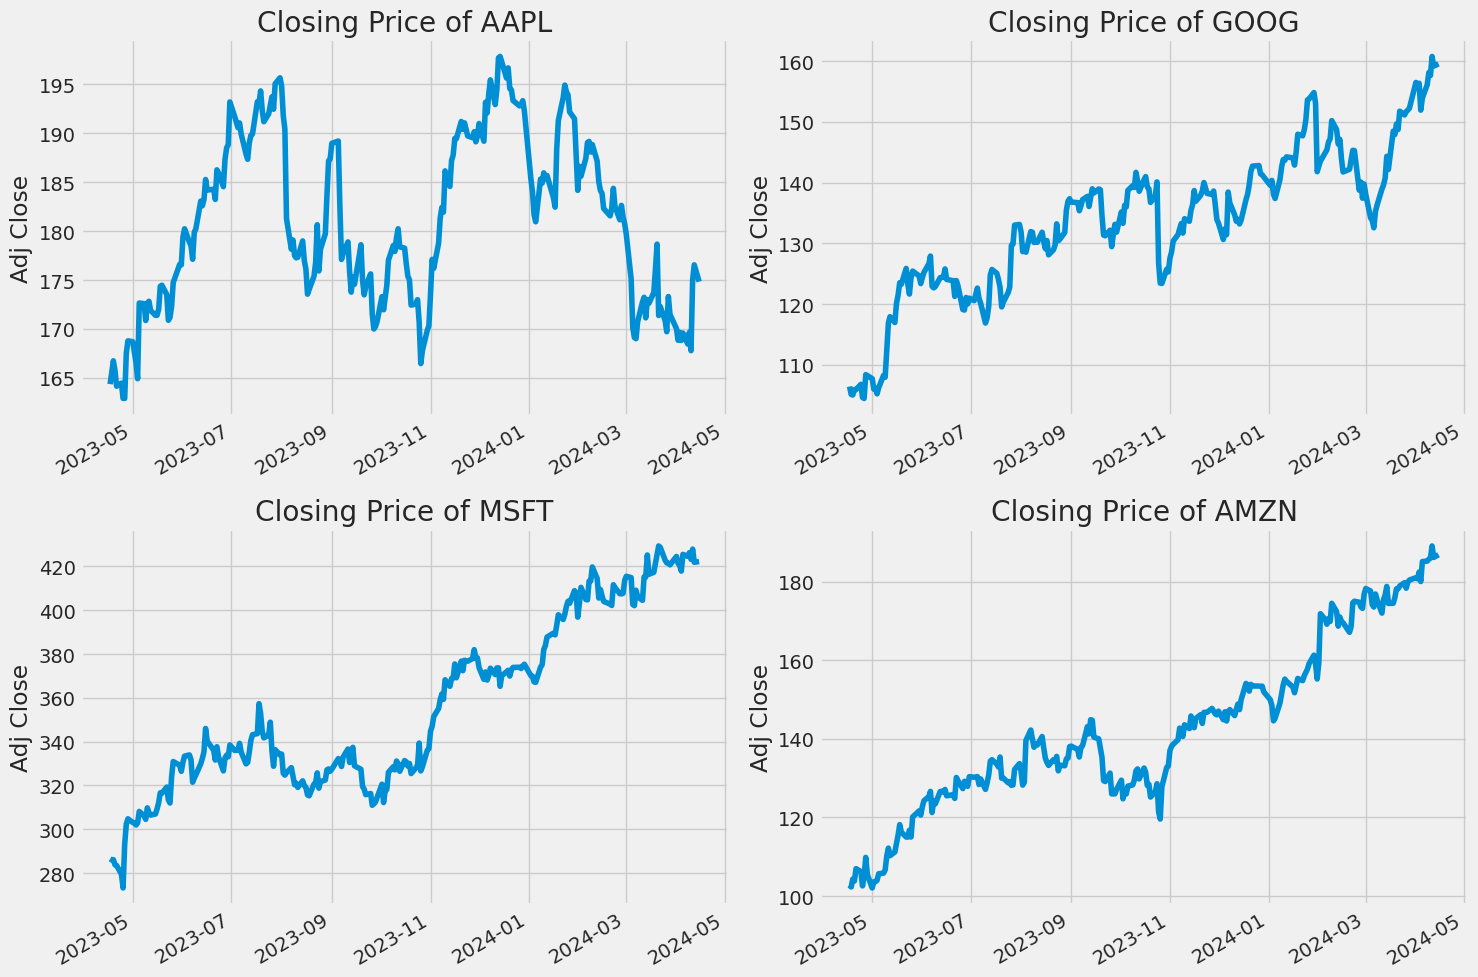

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

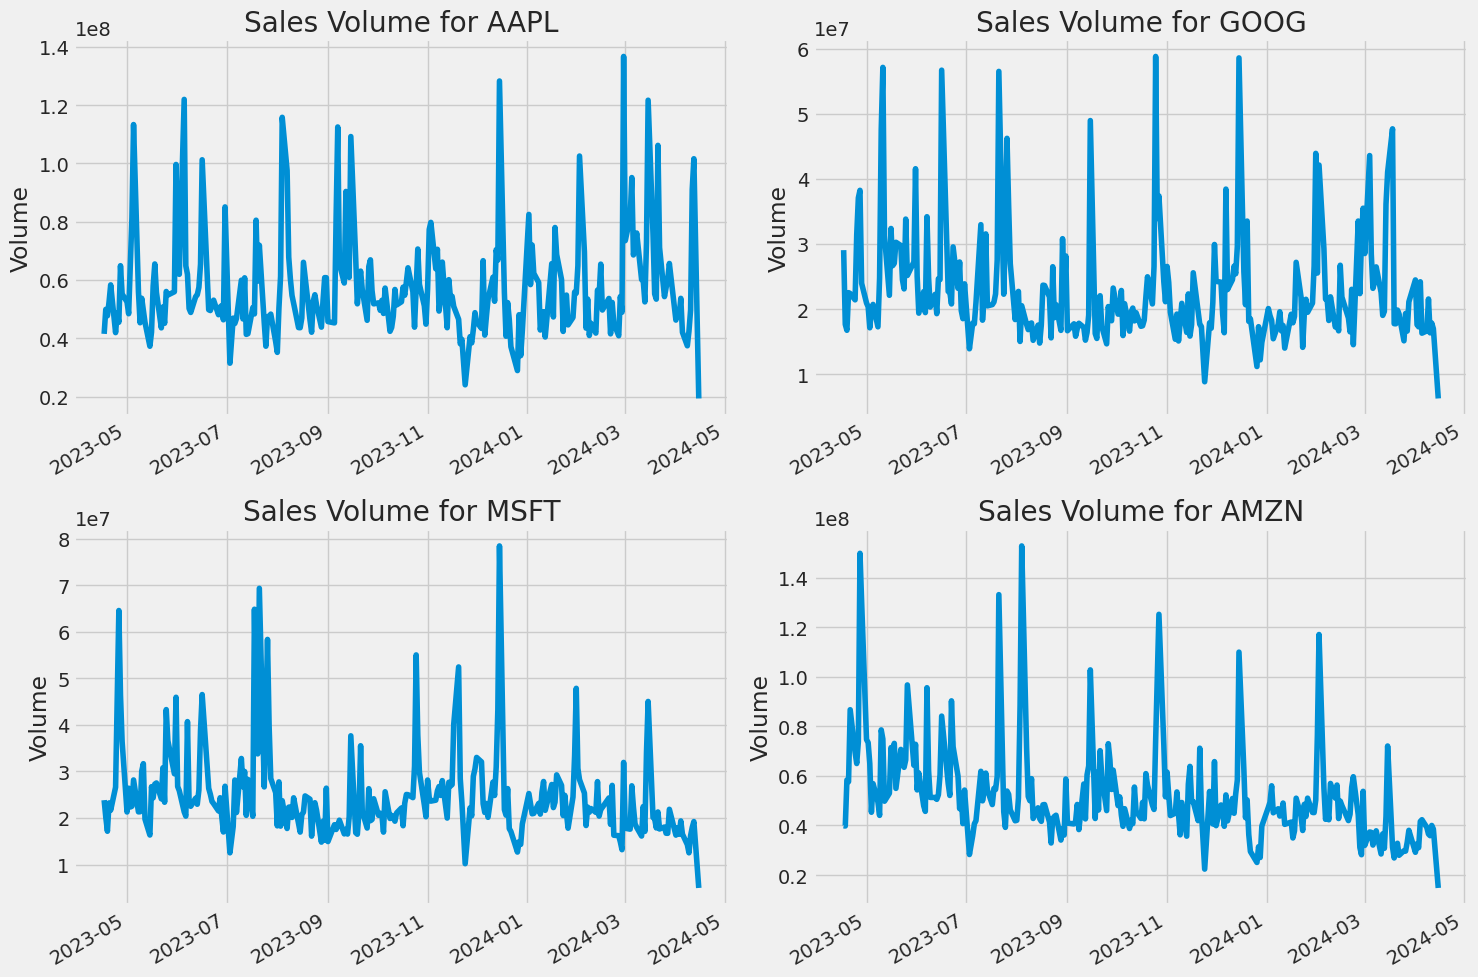

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

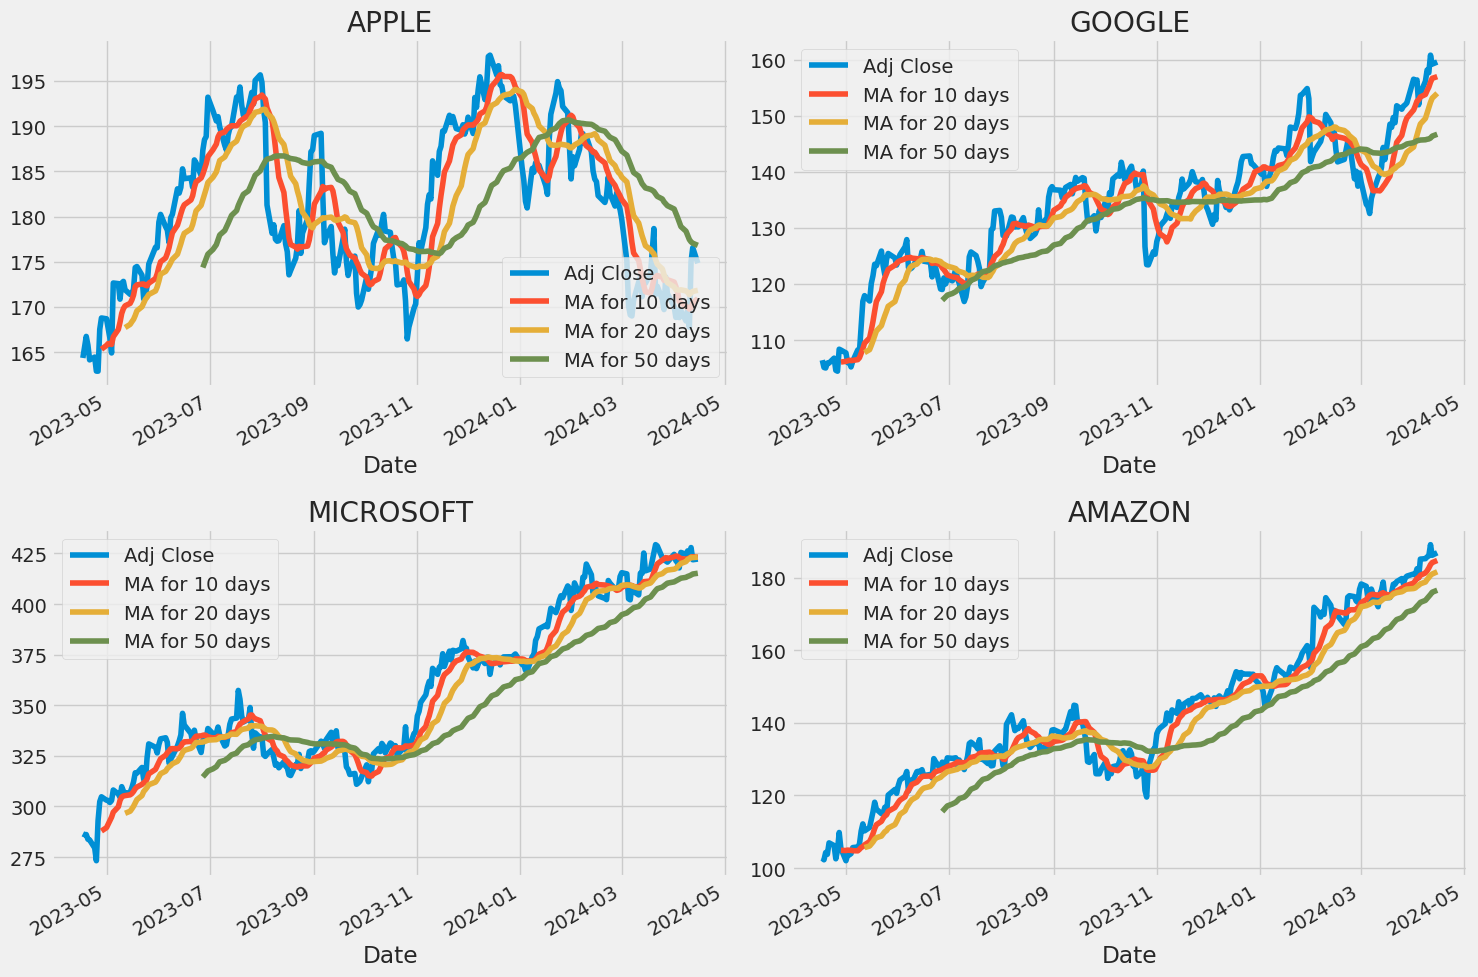

In [ ]:
ma_day = [10, 20, 50]  # Define the moving average days

# Assuming company_list contains DataFrames for each company
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

company_list[0][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

company_list[1][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

company_list[2][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

company_list[3][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()
plt.show()


In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-17,NaN,NaN,NaN,NaN
2023-04-18,0.007505,-0.004283,-0.012216,-0.001489
2023-04-19,0.006968,0.019550,-0.000951,0.000277
2023-04-20,-0.005846,-0.004698,0.008379,-0.008112
2023-04-21,-0.009781,0.030344,0.000094,-0.001223


In [ ]:
# Volatility Prediction

# Drop rows with NaN values
rets = tech_rets.dropna()

# Calculate mean return and standard deviation of return for each stock
mean_returns = rets.mean()
risk = rets.std()

# Display the calculated values
for label, mean_return, risk_value in zip(rets.columns, mean_returns, risk):
    print(f"Stock: {label}, Mean Return: {mean_return}, Risk: {risk_value}")


Stock: AAPL, Mean Return: 0.00032534873867033555, Risk: 0.012277111263735593
Stock: AMZN, Mean Return: 0.0025614120910834506, Risk: 0.01848766494199125
Stock: GOOG, Mean Return: 0.0017665924868624293, Risk: 0.01701059738589782
Stock: MSFT, Mean Return: 0.0016462120051886284, Risk: 0.013775725387951146


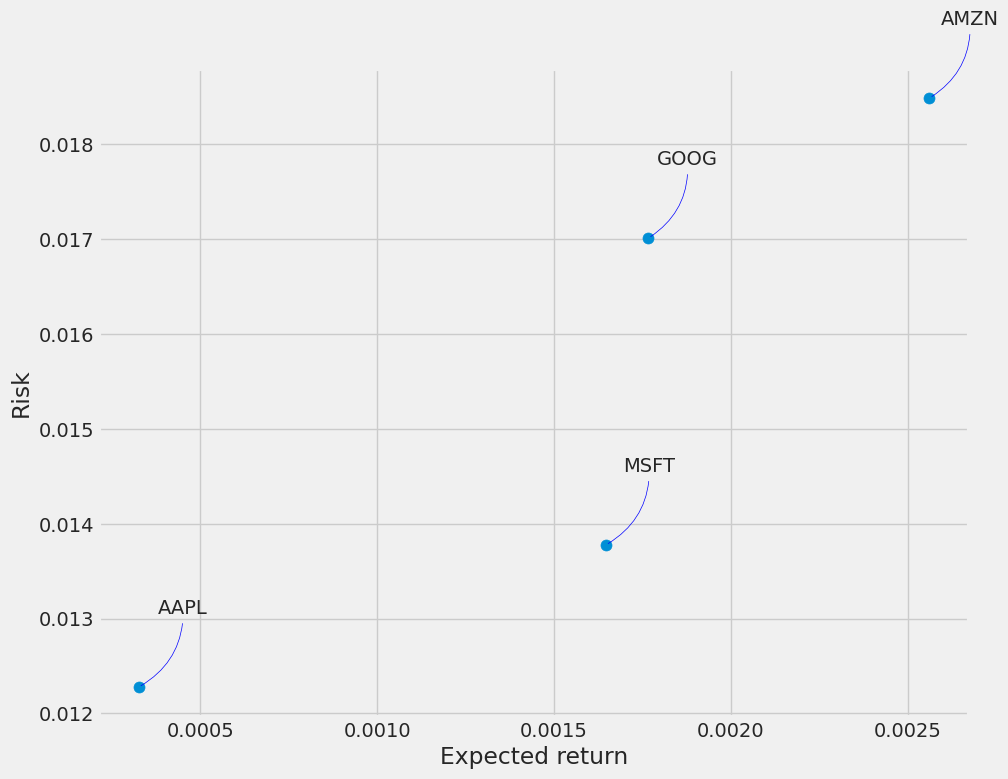

In [ ]:

#How much value do we put at risk by investing in a particular stock?
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433825,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500648,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639429,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771557,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300
2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300


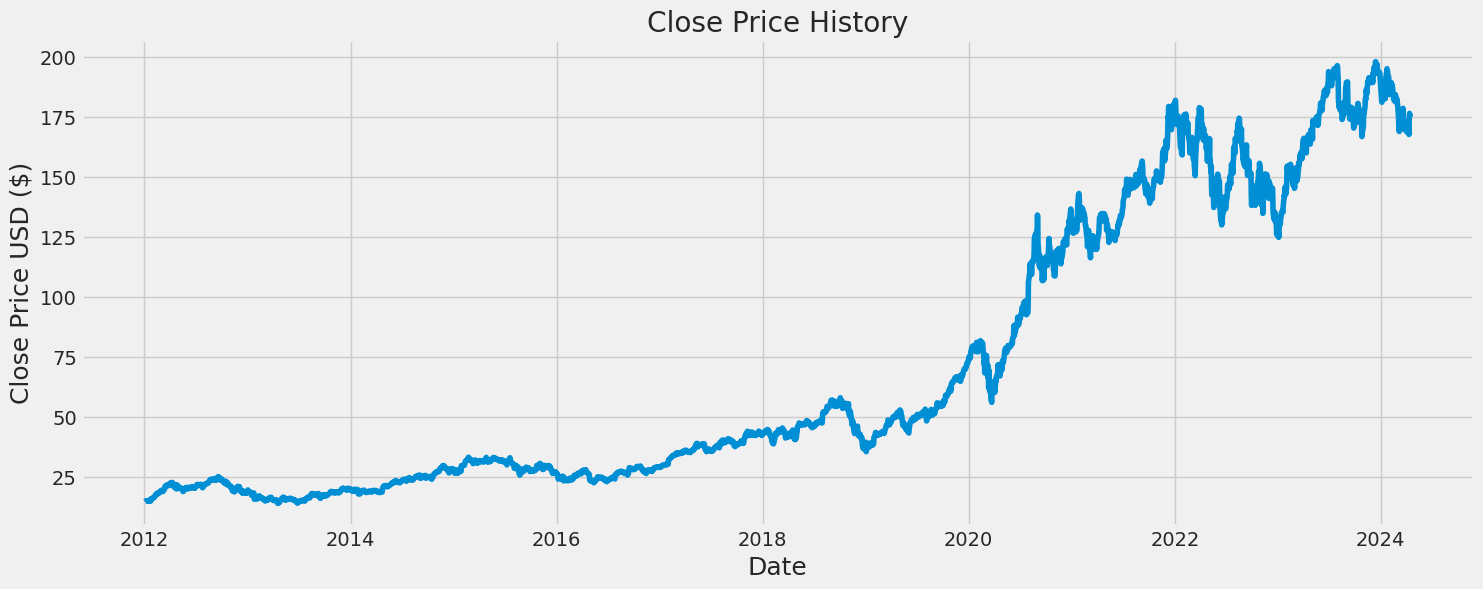

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
#Interval Prediction
# Function to predict future intervals for 10 days
def predict_intervals(model, last_price, scaler, days):
    predictions = []
    X_pred = np.array([last_price]).reshape(1, 1, 1)  # Reshape for LSTM input
    for _ in range(days):
        future_price_scaled = model.predict(X_pred)
        future_price = scaler.inverse_transform(future_price_scaled)
        predictions.append(future_price[0][0])
        X_pred = np.array([future_price_scaled]).reshape(1, 1, 1)  # Update X_pred for next prediction
    return predictions

days = 10  # Number of days to predict
predicted_future_prices = {}
for stock in tech_list:
    last_price = data_dict[stock][-1]
    predicted_future_prices[stock] = predict_intervals(models[stock], last_price, scaler_dict[stock], days)

print("Predicted future prices (10 days interval) for each stock:", predicted_future_prices)


1/1 [==============================] - 0s 14ms/step
Predicted future prices (10 days interval) for each stock: {'AAPL': [175.41249, 175.8186, 176.20947, 176.5861, 176.9494, 177.30019, 177.63927, 177.96727, 178.28485, 178.5926], 'GOOG': [157.85396, 156.18059, 154.72493, 153.45168, 152.33261, 151.34499, 150.47011, 149.69263, 148.99973, 148.38066], 'MSFT': [419.453, 416.44238, 413.40958, 410.35626, 407.28458, 404.19693, 401.09622, 397.98563, 394.86884, 391.74976], 'AMZN': [184.90883, 182.85803, 180.92601, 179.10168, 177.37546, 175.73889, 174.18474, 172.70645, 171.29836, 169.95537]}


In [ ]:
print(globals()[stock])

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-17  103.160004  103.730003  101.589996  102.739998  102.739998   
2023-04-18  103.949997  104.199997  101.519997  102.300003  102.300003   
2023-04-19  101.580002  105.120003  101.389999  104.300003  104.300003   
2023-04-20  103.529999  105.250000  103.209999  103.809998  103.809998   
2023-04-21  106.099998  108.150002  105.080002  106.959999  106.959999   
...                ...         ...         ...         ...         ...   
2024-04-09  187.240005  187.339996  184.199997  185.669998  185.669998   
2024-04-10  182.770004  186.270004  182.669998  185.949997  185.949997   
2024-04-11  186.740005  189.770004  185.509995  189.050003  189.050003   
2024-04-12  187.720001  188.380005  185.080002  186.130005  186.130005   
2024-04-15  187.360001  188.690002  186.190002  186.809998  186.809998   

              Volume company_name  MA

In [ ]:
#Anomaly prediction
actual_prices = {}
for stock in tech_list:
    actual_prices[stock] =  globals()[stock].iloc[-1]

print("Actual Prices (Last Closing Price):")
print(actual_prices)


Actual Prices (Last Closing Price):
{'AAPL': Open              175.380005
High              175.979904
Low               173.850006
Close             174.830002
Adj Close         174.830002
Volume              19364055
company_name           APPLE
MA for 10 days    170.920999
MA for 20 days      171.8355
MA for 50 days    176.812427
Name: 2024-04-15 00:00:00, dtype: object, 'GOOG': Open              160.330002
High              160.830002
Low               159.039993
Close             159.559998
Adj Close         159.559998
Volume               6263035
company_name          GOOGLE
MA for 10 days    156.959999
MA for 20 days    153.986999
MA for 50 days    146.687599
Name: 2024-04-15 00:00:00, dtype: object, 'MSFT': Open              426.549988
High              426.820007
Low                    422.0
Close              422.23999
Adj Close          422.23999
Volume               4961061
company_name       MICROSOFT
MA for 10 days    423.148999
MA for 20 days    423.239499
MA for 50 days

In [ ]:
print(future_prices)

{'AAPL': array([[175.41249]], dtype=float32), 'GOOG': array([[157.85396]], dtype=float32), 'MSFT': array([[419.453]], dtype=float32), 'AMZN': array([[184.90883]], dtype=float32)}


In [ ]:
# Normalize future prices and format as desired

future_prices = {}
for stock in tech_list:
    last_price = data_dict[stock][-1]
    X_pred = np.array([last_price]).reshape(1, 1, 1)
    future_price_scaled = models[stock].predict(X_pred)
    future_price = scaler_dict[stock].inverse_transform(future_price_scaled)
    future_prices[stock] = future_price
normalized_future_prices = {}
for stock, price in future_prices.items():
    # Convert the price to a float and round it to two decimal places
    normalized_price = round(float(price[0][0]), 2)
    # Store the normalized price in the dictionary
    normalized_future_prices[stock] = normalized_price

# Print the normalized future prices
print("Normalized Future Prices:")
print(normalized_future_prices)

1/1 [==============================] - 0s 14ms/step
Normalized Future Prices:
{'AAPL': 175.41, 'GOOG': 157.85, 'MSFT': 419.45, 'AMZN': 184.91}


In [ ]:
# Initialize dictionary to store residuals
residuals = {}

# Compute residuals
for stock in tech_list:
    # Get the actual price from the actual_prices dictionary
    actual_price = actual_prices.get(stock)

    # Get the predicted future price from the normalized_future_prices dictionary
    predicted_future_price = normalized_future_prices.get(stock)

    # Check if actual_price and predicted_future_price are not None
    if actual_price is not None and predicted_future_price is not None:

        actual_price = float(actual_price.iloc[0])
        predicted_future_price = float(predicted_future_price)

        residuals[stock] = predicted_future_price - actual_price
    else:
        print(f"Error: Data for {stock} is missing.")

# Print residuals
for stock, residual in residuals.items():
    print(f"Residual for {stock}: {residual}")


Residual for AAPL: 0.02999511718749659
Residual for GOOG: -2.480001831054693
Residual for MSFT: -7.099987792968761
Residual for AMZN: -2.450000610351566


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


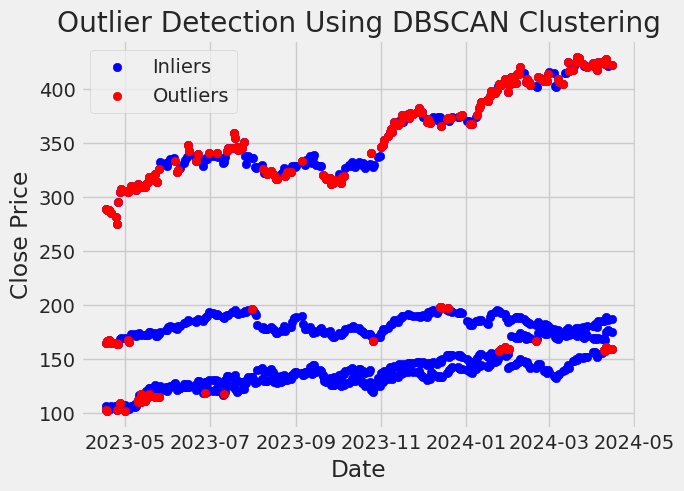

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
company_list = []
for stock in tech_list:
    company_list.append(yf.download(stock, start, end))

df = pd.concat(company_list, axis=0)

# Handling missing data (drop rows with NaN values)
df.dropna(inplace=True)

# Extract 'Close' prices for clustering
X = df[['Close']]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualize outliers
plt.scatter(X.index, X['Close'], c='blue', label='Inliers')
plt.scatter(X.index[clusters == -1], X['Close'][clusters == -1], c='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Outlier Detection Using DBSCAN Clustering')
plt.legend()
plt.show()


In [ ]:
actual_price = {}
for stock in tech_list:
    actual_price[stock] = globals()[stock]['Close'].iloc[-1]

print("Actual Prices (Last Closing Price):")
print(actual_price)


Actual Prices (Last Closing Price):
{'AAPL': 174.8300018310547, 'GOOG': 159.55999755859375, 'MSFT': 422.239990234375, 'AMZN': 186.80999755859375}


In [ ]:
from sklearn.metrics import accuracy_score

# Extract price values from dictionaries
actual_price_values = list(actual_price.values())
future_price_values = list(future_prices.values())

# Calculate accuracy score
accuracy = accuracy_score(actual_price_values, future_price_values)

print(f"Accuracy: {accuracy}")


ValueError: Classification metrics can't handle a mix of continuous and unknown targets